,Conc.,Inhib A,Inhib B
0,8.000,13563,5933
1,4.000,14441,7190
2,2.000,19999,11512
3,1.000,90286,121626
4,0.500,293569,271459
5,0.250,368015,357618
6,0.125,404802,455934
7,0.000,563470,522998


Inhib A IC50: 0.4934556116088376
Inhib A 95% Confidence interval: [0.45645305]to [0.53045817]
Inhib A R-squared: 0.98568158013037


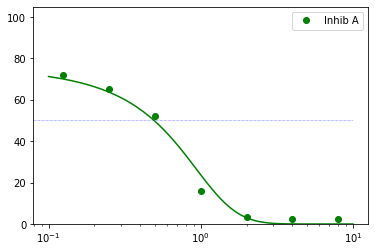

Inhib B IC50: 0.6017532538624983
Inhib B 95% Confidence interval: [0.54356055]to [0.65994596]
Inhib B R-squared: 0.9738639947945519


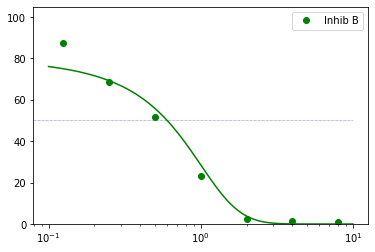

In [32]:
# get packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t

# define model function
def sigmoid(x, x0):
    y = 100 / (1 + 10**(x - x0))
    return y

# extract data from Excel
sheet = pd.read_excel('Input.xlsx', sheet_name='Sheet1')
display(sheet)
sheet_var = sheet.iloc[:,1:]

xdata = sheet.iloc[:,0].to_numpy(np.float64)
xdata = xdata[:-1]

for column in sheet_var:
    ydata0 = sheet_var[column].to_numpy(np.float64)
    max_y = ydata0.max()
    ydata0 = ydata0[:-1]
             
    # sigmoid curve fit
    ydata = ydata0 * 100 / max_y
    popt, pcov = curve_fit(sigmoid, xdata, ydata)
    fit_parameter = str(popt[0])
    print(column + " IC50: " + fit_parameter)

    # 95% confidence interval
    sigma_ab = np.sqrt(np.diagonal(pcov))
    bound_upper = str(popt + sigma_ab)
    bound_lower = str(popt - sigma_ab)
    print(column + " 95% Confidence interval: "+ bound_lower + "to " + bound_upper)

    # R-squared value
    residuals = ydata- sigmoid(xdata, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = str(1 - (ss_res / ss_tot))
    print(column + " R-squared: "+ r_squared)

    # graph data
    x = np.linspace(0.1, 10, 500)
    y = sigmoid(x, *popt)
 
    # plot other stuff and display
    plt.semilogx(xdata, ydata, 'o', label=column, color='green')
    plt.semilogx(x,y, color='green')
    plt.ylim(0, 105)
    plt.legend(loc='best')
    plt.hlines(y = 50, xmin = 0, xmax = 10, color='blue', linewidth=0.5, linestyle=':')
    plt.show()
